In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

x_label='sepal length (cm)'
y_label='petal width (cm)'

X=iris.frame[[x_label, y_label]]
y = iris.frame['target']
target_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=123,stratify=y)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_13652\373261646.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_min, x_max = X.min()[0] - 0.1, X.max()[0] + 0.1
C:\Users\Alexander\AppData\Local\Temp\ipykernel_13652\373261646.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_min, y_max = X.min()[1] - 0.1, X.max()[1] + 0.1


Text(0, 0.5, 'petal width (cm)')

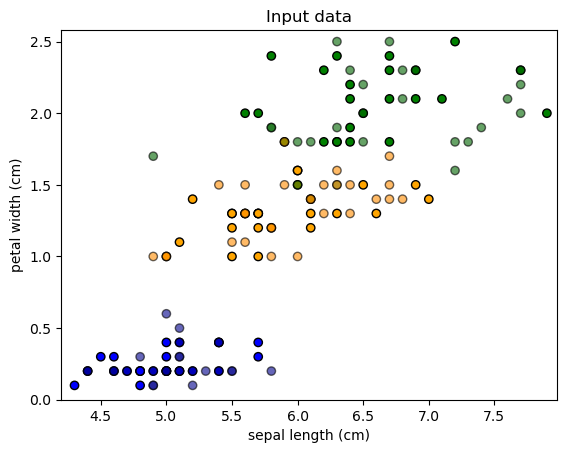

In [3]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns

h = .02  # step size in the mesh
x_min, x_max = X.min()[0] - 0.1, X.max()[0] + 0.1
y_min, y_max = X.min()[1] - 0.1, X.max()[1] + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cmap_light = ListedColormap(['blue', 'orange', 'green'])
cmap_bold = ListedColormap(['darkblue', 'darkorange', 'darkgreen'])

# plot the dataset
fig, ax = plt.subplots()
ax.set_title("Input data")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# Plot the training points
ax.scatter(x=X_train[x_label], y=X_train[y_label], c=y_train, cmap=cmap_light, alpha=1.0, edgecolor="black")
# Plot the testing points
ax.scatter(x=X_test[x_label], y=X_test[y_label], c=y_test, cmap=cmap_bold, alpha=0.6, edgecolor="black")

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

In [4]:
from sklearn import svm
C = 1  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C, max_iter = 20000).fit(X, y)

In [5]:
clf.fit(X_train.values, y_train)
score = clf.score(X_test.values, y_test)
clf_pred = clf.predict(X_test.values)
clf_acc = accuracy_score(y_test, clf_pred)
print(classification_report(y_test, clf_pred, target_names = target_names))
print(score)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.88      0.92      0.90        25
   virginica       0.92      0.88      0.90        25

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75

0.9333333333333333


Text(0, 0.5, 'petal width (cm)')

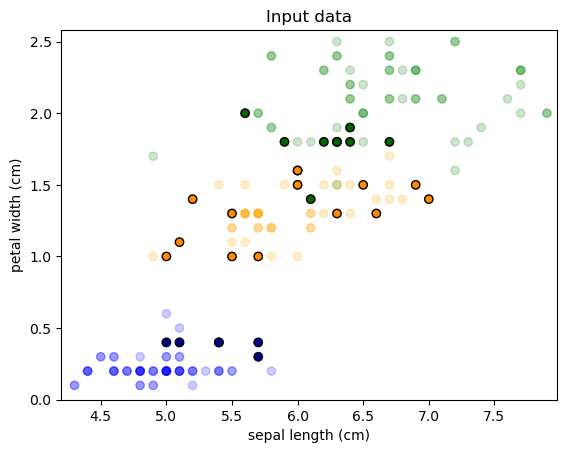

In [6]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
x_sup=clf.support_
X_sup=X_train.iloc[x_sup]
y_sup=y_train.iloc[x_sup]

cm = plt.cm.RdBu

cmap_light = ListedColormap(['blue', 'orange', 'green'])
cmap_bold = ListedColormap(['darkblue', 'darkorange', 'darkgreen'])

# plot the dataset
fig, ax = plt.subplots()
ax.set_title("Input data")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# Plot the training points
ax.scatter(x=X_train[x_label], y=X_train[y_label], c=y_train, cmap=cmap_light, alpha=0.4)
# Plot the testing points
ax.scatter(x=X_test[x_label], y=X_test[y_label], c=y_test, cmap=cmap_light, alpha=0.2)
# Plot the support vectors
ax.scatter(x=X_sup[x_label], y=X_sup[y_label], c=y_sup, cmap=cmap_bold, alpha=1, edgecolor="black")


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

In [7]:
import pandas as pd
import numpy as np 
from sklearn.datasets import load_iris
from sklearn import preprocessing

iris = load_iris(as_frame=True)

x_label='sepal length (cm)'
y_label='petal width (cm)'
z_label= 'petal length (cm)'
X=iris.frame[[x_label, y_label, z_label]]
y = iris.frame['target']
target_names = iris.target_names

scaler = preprocessing.MinMaxScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=123,stratify=y)
С = 1  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=1, gamma=1).fit(X, y)
clf.fit(X_train.values, y_train)
score = clf.score(X_test.values, y_test)
clf_pred = clf.predict(X_test.values)
clf_acc = accuracy_score(y_test, clf_pred)

print("%s accuracy %f" %  ("SVM" , clf_acc))
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

x_sup=clf.support_
X_sup=X_train.iloc[x_sup]
y_sup=y_train.iloc[x_sup]

SVM accuracy 0.933333
[[25  0  0]
 [ 0 23  2]
 [ 0  3 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.88      0.92      0.90        25
           2       0.92      0.88      0.90        25

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['blue', 'orange', 'green'])
cmap_bold = ListedColormap(['darkblue', 'darkorange', 'darkgreen'])
fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot( projection='3d')

ax.set_title("Input data")

ax.scatter3D(X_train[x_label], X_train[y_label], X_train[z_label], c=y_train, cmap=cmap_light, alpha=0.6, edgecolor="black", s =100 )
ax.scatter3D(X_test[x_label], X_test[y_label], X_test[z_label], c=y_test, cmap=cmap_light, alpha=0.4, s =100  )
ax.scatter3D(X_sup[x_label], X_sup[y_label], X_sup[z_label], c="black", facecolor="black", marker='x', s =100 )

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)

for j in range (0,3):
    zz = lambda x,y: (-clf.intercept_[j]-clf.coef_[j][0]*x -clf.coef_[j][1]*y) / clf.coef_[j][2]
    tmpx = np.linspace(0,1,10)
    tmpy = np.linspace(0,1,10)
    xx,yy = np.meshgrid(tmpx,tmpy)
    ax.plot_surface(xx, yy, zz(xx,yy), alpha=0.2)

ax.view_init(azim=-12, elev=3)
#ax.view_init(azim=-90, elev=90)

plt.show()

<IPython.core.display.Javascript object>

In [ ]:
%matplotlib inline 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123, stratify=y)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train.values, y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.714 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.810 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.762 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.762 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

In [11]:
clf = grid.best_estimator_
clf.fit(X_train.values, y_train)
score = clf.score(X_test.values, y_test)
clf_pred = clf.predict(X_test.values)
clf_acc = accuracy_score(y_test, clf_pred)

print("%s accuracy %f" %  ("SVM" , clf_acc))
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

SVM accuracy 0.977778
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

